In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

In [12]:
import os

folder_path = 'core/static/data/p1_sensor_data'

all_dataframes = []

for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        all_dataframes.append(df)

combined_df = pd.concat(all_dataframes, ignore_index=True)

combined_df.head()

,time,downlink_url,created_at,counter,device_id,hardware_serial,device_status,app_region,event_type,dev_id,...,E_TST,E_PP,E_MP,E_RT1,E_RT2,E_LPF,E_PF,G_TST,E_TI,G_M3
0,2023-04-02T23:53:17.497254532Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T23:53:18.064569+00:00,53.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,NaN,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-02T23:38:20.995538484Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T23:38:21.268662+00:00,52.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,NaN,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-02T23:23:22.562630164Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T23:23:22.820277+00:00,51.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,NaN,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-02T23:08:23.121468651Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T23:08:23.382326+00:00,50.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,NaN,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-02T22:53:23.653920691Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T22:53:23.925395+00:00,49.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,NaN,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


GELVERDE DATASET

In [13]:
columns_all_null = combined_df.columns[combined_df.isnull().all()].tolist()

print("Columns with all null values:", columns_all_null)

Columns with all null values: ['app_region', 'device_name', 'premium', 'device_type', 'device_registration_date', 'building_name', 'owner_name', 'organisation_name', 'room_id', 'floor', 'ui_x_axis', 'ui_y_axis']


In [16]:
df_cleaned = combined_df.drop(columns=combined_df.columns[combined_df.isnull().all()].tolist())

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43519 entries, 0 to 43518
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             43196 non-null  object 
 1   downlink_url     43514 non-null  object 
 2   created_at       43519 non-null  object 
 3   counter          43196 non-null  float64
 4   device_id        43519 non-null  object 
 5   hardware_serial  43514 non-null  object 
 6   device_status    43519 non-null  object 
 7   event_type       43519 non-null  object 
 8   dev_id           43519 non-null  object 
 9   owner            43519 non-null  object 
 10  organisation     43519 non-null  object 
 11  building         43519 non-null  object 
 12  payload_ver      43196 non-null  float64
 13  payload_E_DT1    22633 non-null  float64
 14  payload_E_DT2    20525 non-null  float64
 15  payload_VER      20525 non-null  object 
 16  payload_E_TST    20525 non-null  float64
 17  payload_E_PP

In [17]:
df_cleaned.head()

,time,downlink_url,created_at,counter,device_id,hardware_serial,device_status,event_type,dev_id,owner,...,E_TST,E_PP,E_MP,E_RT1,E_RT2,E_LPF,E_PF,G_TST,E_TI,G_M3
0,2023-04-02T23:53:17.497254532Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T23:53:18.064569+00:00,53.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,bf533e35-b231-4427-8ae6-79d76a72b383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-02T23:38:20.995538484Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T23:38:21.268662+00:00,52.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,bf533e35-b231-4427-8ae6-79d76a72b383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-02T23:23:22.562630164Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T23:23:22.820277+00:00,51.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,bf533e35-b231-4427-8ae6-79d76a72b383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-02T23:08:23.121468651Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T23:08:23.382326+00:00,50.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,bf533e35-b231-4427-8ae6-79d76a72b383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-04-02T22:53:23.653920691Z,https://hbi-lighting.eu1.cloud.thethings.indus...,2023-04-02T22:53:23.925395+00:00,49.0,f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-...,70B3D543800163EB,OK,status,caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591,bf533e35-b231-4427-8ae6-79d76a72b383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_cleaned['device_id'].unique()

array(['f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-b231-4427-8ae6-79d76a72b383#833ed7e1-d4b6-47df-b008-c4a619de6831#caf3eaf5-bab9-47f3-b5e1-cf1a4ef70591',
       'f50c5577-da7e-412e-8998-ed381aec7966#bf533e35-b231-4427-8ae6-79d76a72b383#833ed7e1-d4b6-47df-b008-c4a619de6831#3711028d-aed2-4f0c-b84a-b4e283148919'],
      dtype=object)

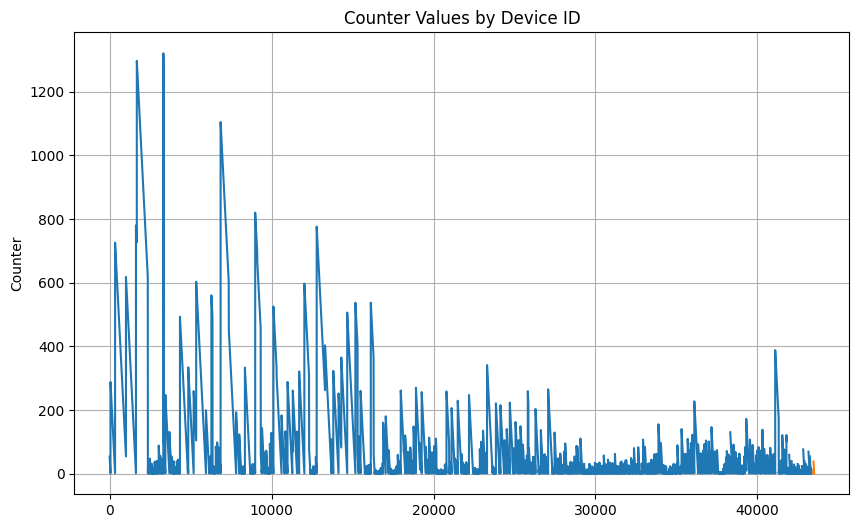

In [25]:
plt.figure(figsize=(10, 6))

for device_id in df_cleaned['device_id'].unique():
    device_data = df_cleaned[df_cleaned['device_id'] == device_id]
    plt.plot(device_data['counter'], label=device_id)

plt.ylabel('Counter')
plt.title('Counter Values by Device ID')
plt.grid(True)
plt.show()

In [29]:
combined_df['time'] = pd.to_datetime(combined_df['time'])
combined_df = combined_df.drop_duplicates(subset=['time'])

combined_df = combined_df.sort_values(by='time')
combined_df['interval'] = combined_df['time'].diff()

first_time = combined_df['time'].iloc[0]

combined_df.loc[combined_df.index[0], 'interval'] = combined_df.loc[combined_df.index[0], 'time'] - first_time
combined_df['interval_readable'] = combined_df['interval'].apply(lambda x: f"{x.days} days, {x.seconds // 3600} hours, {(x.seconds // 60) % 60} minutes, {x.seconds % 60} seconds" if pd.notnull(x) else "")

print(combined_df[['time', 'interval_readable']].head())


                                   time  \
336 2023-03-31 10:50:40.086777232+00:00   
335 2023-03-31 10:58:02.910664075+00:00   
334 2023-03-31 11:07:54.688168575+00:00   
333 2023-03-31 11:17:56.908619332+00:00   
332 2023-03-31 11:27:59.502435410+00:00   

                          interval_readable  
336   0 days, 0 hours, 0 minutes, 0 seconds  
335  0 days, 0 hours, 7 minutes, 22 seconds  
334  0 days, 0 hours, 9 minutes, 51 seconds  
333  0 days, 0 hours, 10 minutes, 2 seconds  
332  0 days, 0 hours, 10 minutes, 2 seconds  
